In [1]:
#apply logistic regression on training data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [2]:
#read data, apply 80:20 split for train vs validation
data = pd.read_csv('data/train.csv', index_col=False)
data = data.sample(frac=1, random_state=1)
train = data[:int(len(data) * 0.8)]
val = data[int(len(data) * 0.8):]
print(train.shape)
print(val.shape)
#print(train.head())
print(val.head())

(566, 1026)
(142, 1026)
                    Unnamed: 0  hits    0    1    2    3    4    5    6    7  \
660               Azaguanine-8     1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
649  Ondansetron Hydrochloride     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
505             Chlorothiazide     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
575                Bromperidol     1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
231               Quinethazone     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     ...   1014  1015  1016  1017  1018  1019  1020  1021  1022  1023  
660  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
649  ...    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
505  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
575  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  
231  ...    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  

[5 rows x 1026 columns]


In [3]:
#support vector machine
model = SVC(C=5, probability=False, random_state=6, class_weight={1:3, 0:1})
model.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)  
accuracy = model.score(val.iloc[:, 2:].values, val.iloc[:, 1].values)
val_pred = model.predict(val.iloc[:, 2:].values) 
precision = precision_score(val.iloc[:, 1].values, val_pred)
recall = recall_score(val.iloc[:, 1].values, val_pred)
f1 = f1_score(val.iloc[:, 1].values, val_pred)
print(accuracy, precision, recall, f1)


0.718309859155 0.341463414634 0.518518518519 0.411764705882


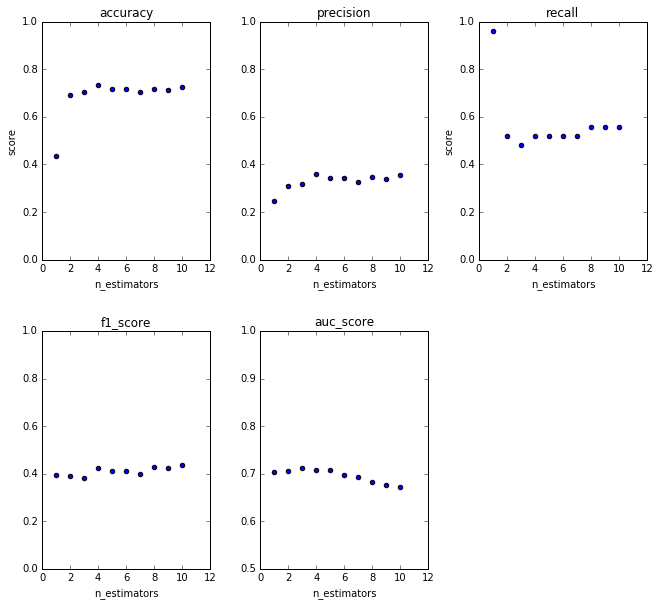

In [4]:
#test different penalty using support vector machine
penalty = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
val_accuracy = []
val_precision = []
val_recall = []
val_f1 = []
auc_scores = []
for c in penalty:  
    model = SVC(C=c, probability=True, random_state=6, class_weight={1:3, 0:1})
    model.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)    
    val_accuracy.append(model.score(val.iloc[:, 2:].values, val.iloc[:, 1].values))
    val_pred = model.predict(val.iloc[:, 2:].values)    
    val_precision.append(precision_score(val.iloc[:, 1].values, val_pred))
    val_recall.append(recall_score(val.iloc[:, 1].values, val_pred))
    val_f1.append(f1_score(val.iloc[:, 1].values, val_pred))
    val_pred_proba = model.predict_proba(val.iloc[:, 2:].values)
    auc_scores.append(roc_auc_score(val.iloc[:, 1].values, val_pred_proba[:, 1]))

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=2, wspace=0.3, hspace=0.3)
plt.subplot(231)
plt.title('accuracy')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.ylim(0,1)
plt.scatter(penalty, val_accuracy)
plt.subplot(232)
plt.title('precision')
plt.xlabel('n_estimators')
plt.ylim(0,1)
plt.scatter(penalty, val_precision)
plt.subplot(233)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.ylim(0,1)
plt.scatter(penalty, val_recall)
plt.subplot(234)
plt.title('f1_score')
plt.xlabel('n_estimators')
plt.ylim(0,1)
plt.scatter(penalty, val_f1)
plt.subplot(235)
plt.title('auc_score')
plt.xlabel('n_estimators')
plt.ylim(0.5,1)
plt.scatter(penalty, auc_scores)

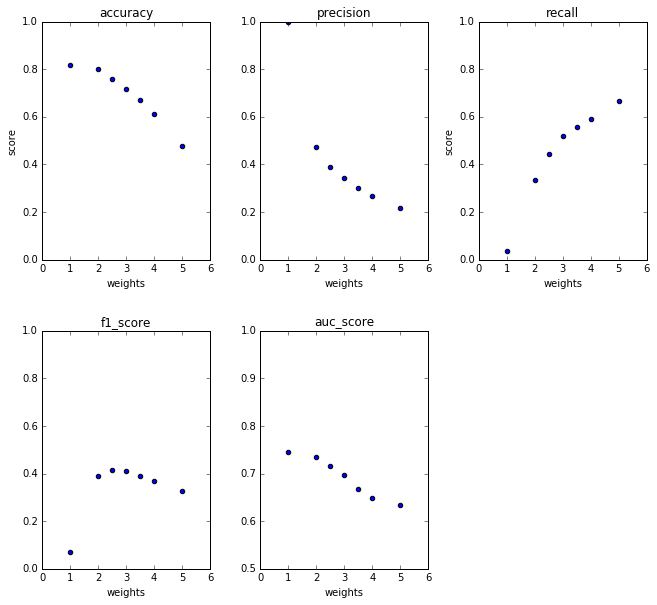

In [5]:
#test different weights using support vector machine
parameters = [1, 2, 2.5, 3, 3.5, 4, 5]
val_accuracy = []
val_precision = []
val_recall = []
val_f1 = []
auc_scores = []
for para in parameters:  
    model = SVC(C=6, probability=True, random_state=6, class_weight={1:para, 0:1})
    model.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)    
    val_accuracy.append(model.score(val.iloc[:, 2:].values, val.iloc[:, 1].values))
    val_pred = model.predict(val.iloc[:, 2:].values)    
    val_precision.append(precision_score(val.iloc[:, 1].values, val_pred))
    val_recall.append(recall_score(val.iloc[:, 1].values, val_pred))
    val_f1.append(f1_score(val.iloc[:, 1].values, val_pred))
    val_pred_proba = model.predict_proba(val.iloc[:, 2:].values)
    auc_scores.append(roc_auc_score(val.iloc[:, 1].values, val_pred_proba[:, 1]))

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=2, wspace=0.3, hspace=0.3)
plt.subplot(231)
plt.title('accuracy')
plt.ylabel('score')
plt.xlabel('weights')
plt.ylim(0,1)
plt.scatter(parameters, val_accuracy)
plt.subplot(232)
plt.title('precision')
plt.xlabel('weights')
plt.ylim(0,1)
plt.scatter(parameters, val_precision)
plt.subplot(233)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('weights')
plt.ylim(0,1)
plt.scatter(parameters, val_recall)
plt.subplot(234)
plt.title('f1_score')
plt.xlabel('weights')
plt.ylim(0,1)
plt.scatter(parameters, val_f1)
plt.subplot(235)
plt.title('auc_score')
plt.xlabel('weights')
plt.ylim(0.5,1)
plt.scatter(parameters, auc_scores)

auc_score: 0.6962962962962963


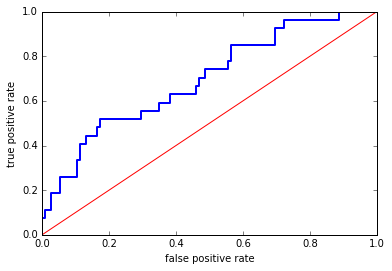

In [6]:
#roc curve
model = SVC(C=6, probability=True, random_state=6, class_weight={1:3, 0:1})
model.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)
pred = model.predict_proba(val.iloc[:, 2:].values)
auc_score = roc_auc_score(val.iloc[:, 1].values, pred[:, 1])
fpr, tpr, thresholds = roc_curve(val.iloc[:, 1].values, pred[:, 1])

print('auc_score: {}'.format(auc_score))

#plot auc curve
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(fpr, tpr, c='b', linewidth=2)
plt.plot([0, 1], [0, 1], c='r', linewidth=1)